In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import recall_score, f1_score
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import Callback

In [28]:
X_train_org = np.load('Xtrain1.npy')
Y_train_org = np.load('Ytrain1.npy')
X_extra_org = np.load('Xtrain1_extra.npy') 
X_test = np.load('Xtest1.npy')

In [29]:
X_train_org.shape, Y_train_org.shape

((2783, 2304), (2783,))

0
1
1


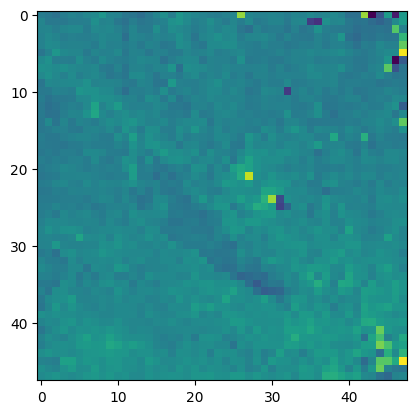

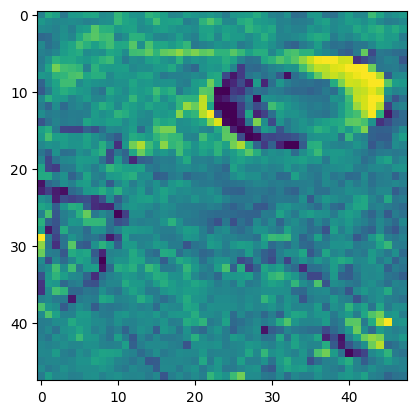

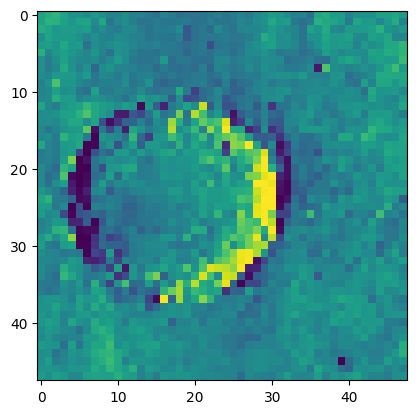

In [30]:
for i in range(3):
    print(Y_train_org[i])
    plt.figure()
    plt.imshow(X_train_org[i].reshape(48,48))

In [31]:
# Scale data from [0,255] to [0,1]
train_images = (X_train_org).astype('float32')/255.0
# Get label vectors
train_labels = keras.utils.to_categorical(Y_train_org,2)

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

In [32]:
np.sum(y_train,axis=0), np.sum(y_val,axis=0)

(array([ 792., 1434.]), array([214., 343.]))

MLP model

In [14]:
from keras.regularizers import l2

In [15]:
# Add fully connected layes with different numbers of neurons
model_MLP = Sequential()

model_MLP.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_MLP.add(Dropout(0.3))  # Increased dropout for regularization
model_MLP.add(Dense(64, activation='relu'))
model_MLP.add(Dropout(0.3))  # Increased dropout for regularization
model_MLP.add(Dense(32, activation='relu'))
model_MLP.add(Dense(2, activation='softmax'))  # Assuming binary classification

model_MLP.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,442 (1.17 MB)

 Trainable params: 305,442 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
16*48**2+16

36880

In [17]:
batch_size=64
epochs=250
lr=0.00005

Epoch 1/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6057 - loss: 0.6766 - val_accuracy: 0.6463 - val_loss: 0.6522
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 0.6618 - val_accuracy: 0.6463 - val_loss: 0.6464
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 0.6632 - val_accuracy: 0.6463 - val_loss: 0.6542
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6469 - loss: 0.6492 - val_accuracy: 0.6463 - val_loss: 0.6501
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6242 - loss: 0.6642 - val_accuracy: 0.6463 - val_loss: 0.6492
Epoch 6/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6456 - loss: 0.6497 - val_accuracy: 0.6463 - val_loss: 0.6578
Epoch 7/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.6558 - val_accuracy: 0.6463 - val_loss: 0.6517
Epoch 8/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6308 - loss: 0.6570 - val_accuracy: 0.6463 - v

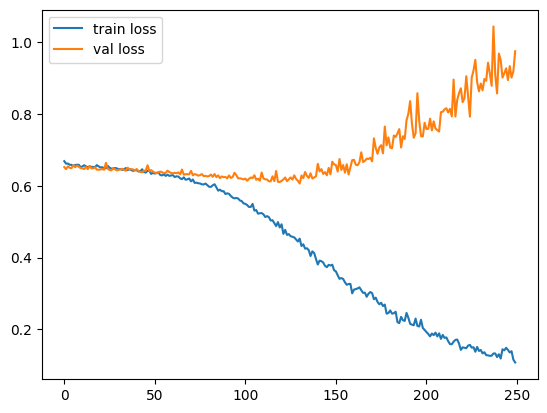

In [18]:
adam = keras.optimizers.Adam(learning_rate = lr)
model_MLP.compile(optimizer = adam,loss = 'categorical_crossentropy', metrics=['accuracy'])

#MLP without early stopping
history = model_MLP.fit(x = X_train,y=y_train,epochs = epochs,batch_size=batch_size,validation_data = (X_val,y_val),verbose = 1)

####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['loss'], label='train loss'),
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

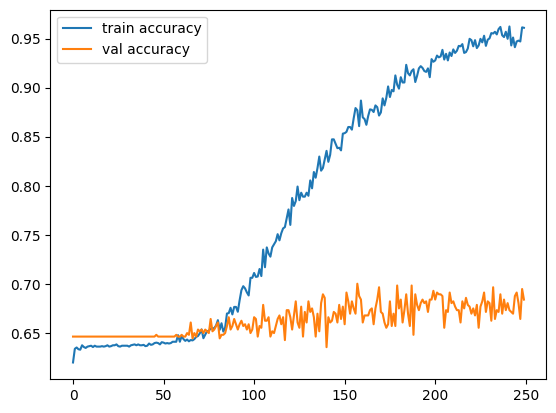

In [20]:
####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['accuracy'], label='train accuracy'),
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

CNN model


In [33]:
# Set up the model
model_CNN = Sequential()
model_CNN.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))
model_CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.3))
model_CNN.add(Dense(2, activation='softmax'))

# Compile the model
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model_CNN.summary()

# Data Augmentation
#datagen = ImageDataGenerator(
#    rotation_range=30,
#    width_shift_range=0.15,
#    height_shift_range=0.15,
#    shear_range=0.15,
#    zoom_range=0.25,
#    horizontal_flip=True,
#    vertical_flip=True,
#    fill_mode='nearest'
#)

# Assuming X_train and y_train are your training data and labels
# Reshape X_train and X_val to (num_samples, 48, 48, 1)
X_train = X_train.reshape(-1, 48, 48, 1)
X_val = X_val.reshape(-1, 48, 48, 1)

class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_recalls = []
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs={}):
        # Get predictions on validation data
        y_pred_probs = self.model.predict(self.validation_data[0])
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(self.validation_data[1], axis=1)

        # Calculate recall and F1 score
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        self.val_recalls.append(recall)
        self.val_f1s.append(f1)

        print(f' — val_recall: {recall:.4f} — val_f1: {f1:.4f}')
        
    def set_val_data(self, val_data):
        self.validation_data = val_data

# Fit the model with data augmentation
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

metrics = Metrics()
metrics.set_val_data((X_val, y_val))

history = model_CNN.fit(X_train, y_train, batch_size=50,
                         epochs=100,
                         validation_data=(X_val, y_val), callbacks=[reduce_lr, metrics, early_stopping],
                         verbose=1) # add callbacks=[early_stopping] as arg. for early stopping


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 16)       │         9,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,626 (174.32 KB)

 Trainable params: 44,626 (174.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  - accuracy: 0.6279 - loss: 0.6
 — val_recall: 1.0000 — val_f1: 0.7622
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6281 - loss: 0.6584 - val_accuracy: 0.6158 - val_loss: 0.6639 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  - accuracy: 0.6448 - loss: 0.6
 — val_recall: 1.0000 — val_f1: 0.7622
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6448 - loss: 0.6318 - val_accuracy: 0.6158 - val_loss: 0.5970 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  - accuracy: 0.6438 - loss: 0.5
 — val_recall: 0.9679 — val_f1: 0.8405
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6471 - loss: 0.5743 - val_accuracy: 0.7738 - val_loss: 0.5476 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  - accuracy: 0.7963 - loss: 0.5
 — val_recall: 0.9563 — val_f1: 0.8586
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7964 - loss: 0.5289 - val_accuracy: 0.

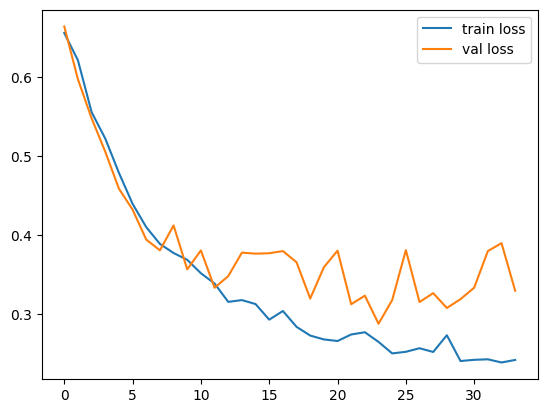

In [34]:
####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['loss'], label='train loss'),
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

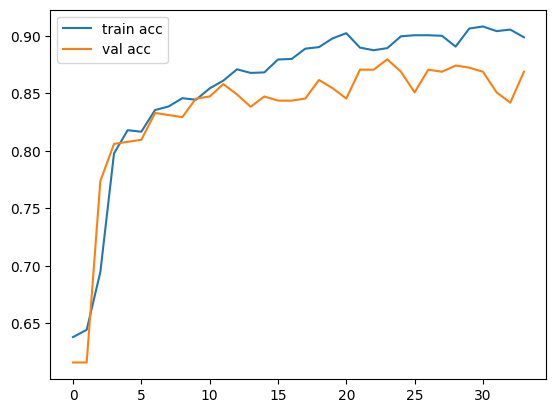

In [35]:
####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['accuracy'], label='train acc'),
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

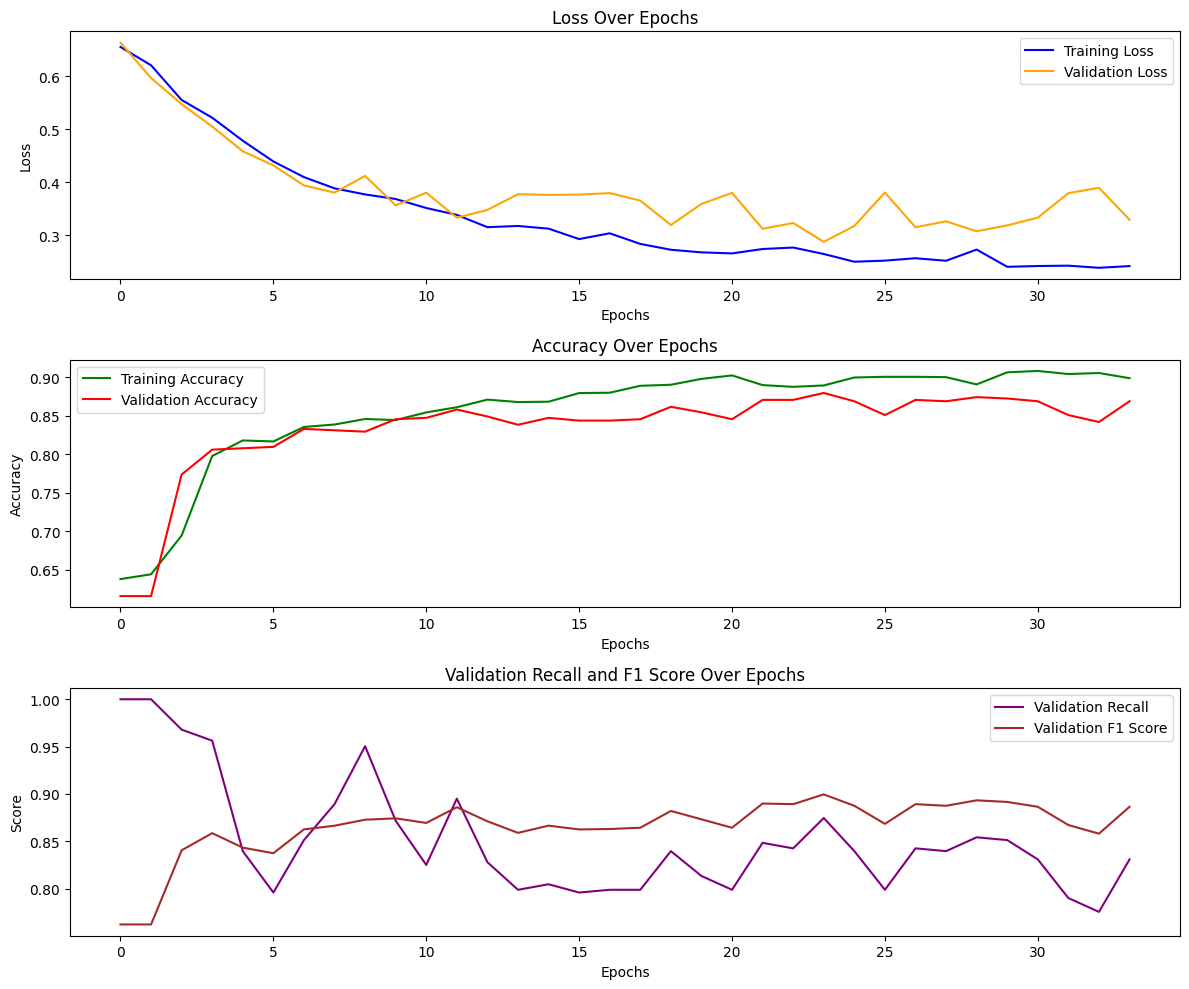

In [36]:
plt.figure(figsize=(12, 10))

# Plot Loss
plt.subplot(3, 1, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(3, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Recall and F1 Score
plt.subplot(3, 1, 3)
plt.plot(metrics.val_recalls, label='Validation Recall', color='purple')
plt.plot(metrics.val_f1s, label='Validation F1 Score', color='brown')
plt.title('Validation Recall and F1 Score Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
metrics.val_f1s[-20:]

[0.8665620094191523,
 0.8625592417061612,
 0.862992125984252,
 0.864353312302839,
 0.8820826952526799,
 0.8732394366197185,
 0.864353312302839,
 0.8899082568807339,
 0.8892307692307693,
 0.8995502248875563,
 0.8875192604006162,
 0.8684627575277337,
 0.8892307692307693,
 0.8875192604006162,
 0.8932926829268292,
 0.8916030534351145,
 0.8864696734059098,
 0.8672,
 0.8580645161290323,
 0.8864696734059098]